<a href="https://colab.research.google.com/github/SirilukLee/MachineLearning-KMITL/blob/main/My_Intro_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the sample data from integers to floating-point numbers:

In [2]:
mnist = tf.keras.datasets.mnist #ภาพ 28x28

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Build a machine learning model

Build a `tf.keras.Sequential` model by stacking layers.

We are building a neural network with 784 input neurons, 16 hidden neurons, and 10 output neurons

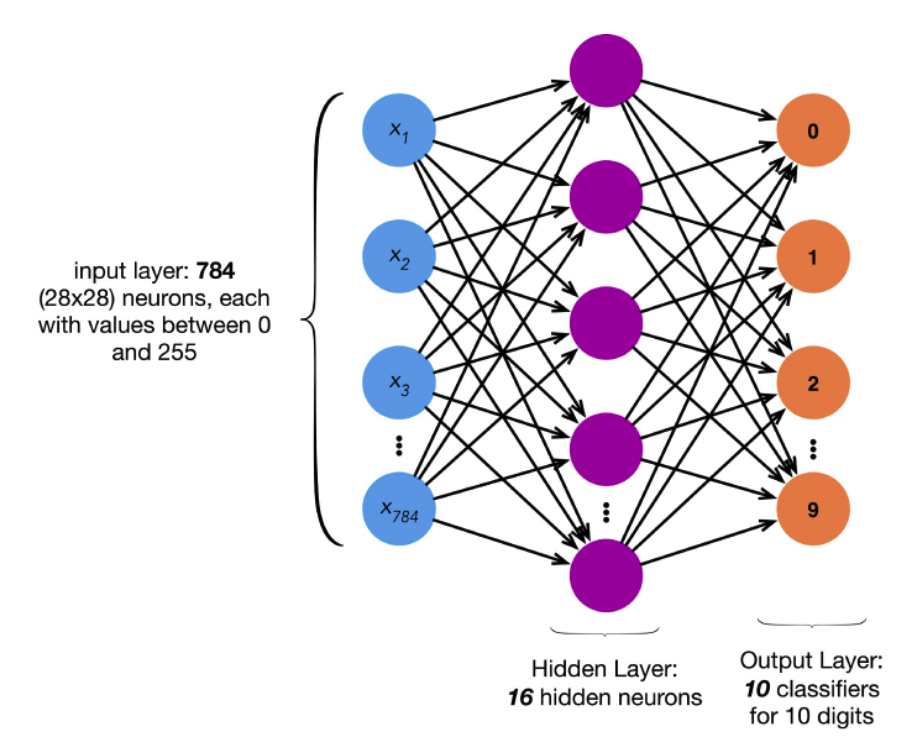

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), #flatten จาก สองมิติเป็นเวคเตอร์  784
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

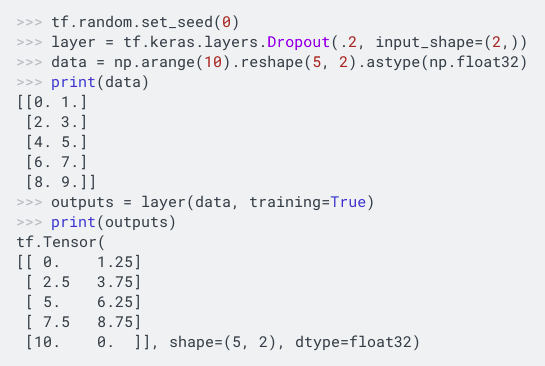

In [ ]:
#Drop out ช่วยลดปัญหา overfit ลดโหนดออก ทำให้โหนดเป็น0

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.30100456, -0.2562895 , -0.28626317, -0.55975056,  0.28594944,
         0.0267865 , -0.19001272,  0.54370517, -0.4021211 , -0.00253021]],
      dtype=float32)

Define a loss function for training using `losses.SparseCategoricalCrossentropy`, which takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [8]:
loss_fn(y_train[:1], predictions).numpy()

2.2150164

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [10]:
model.compile(optimizer='adam',
              loss=loss_fn,                    #back propagation
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss: 

In [24]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3004 - accuracy: 0.9051
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2945 - accuracy: 0.9056
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2917 - accuracy: 0.9074
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2932 - accuracy: 0.9068
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2886 - accuracy: 0.9075
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2856 - accuracy: 0.9085
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2864 - accuracy: 0.9081
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2813 - accuracy: 0.9107
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2805 - accuracy: 0.9110
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.283

The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [25]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.1841 - accuracy: 0.9482 - 337ms/epoch - 1ms/step


[0.18411730229854584, 0.948199987411499]

The image classifier is now trained to ~94% accuracy on this dataset.

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [26]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax() #softmax แปลงผลลัพเป็นค่าความน่าจะเป็น
])

In [27]:
probability_model(x_test[:2])   #ดูค่าความน่าจะเป็นตัวที่สูงที่สุดก็น่าจะเป็นตัวนั้น

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[3.7434812e-12, 1.4598720e-15, 1.6872077e-07, 1.6122688e-04,
        1.0334953e-16, 7.7791881e-08, 5.7266876e-27, 9.9983549e-01,
        1.1993694e-09, 2.9944999e-06],
       [1.0118122e-09, 1.8157384e-07, 9.7339070e-01, 2.6597649e-02,
        2.1167144e-18, 3.6785647e-08, 3.0922733e-11, 2.2438241e-08,
        1.1391191e-05, 4.6639169e-16]], dtype=float32)>

7


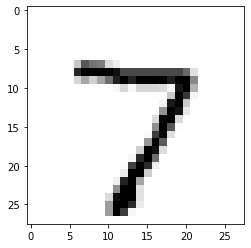

In [28]:
import matplotlib.pyplot as plt
print(y_test[0]) # The label is 7
plt.imshow(x_test[0], cmap='Greys')

2


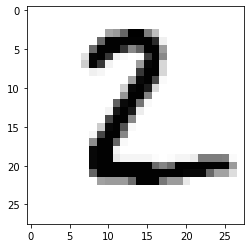

In [29]:
import matplotlib.pyplot as plt
print(y_test[1]) # The label is 2
plt.imshow(x_test[1], cmap='Greys')

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
